In [183]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from vnstock import listing_companies, ticker_overview, stock_historical_data 
from plotly.subplots import make_subplots
import plotly.graph_objects as go  
from scipy.signal import argrelextrema
from collections import deque
from matplotlib.lines import Line2D

# A. Biểu đồ 

#### Danh sách các mã cổ phiếu trên thị trường

In [184]:
list = listing_companies()
list.tail(50)

,ticker,group_code,company_name,company_short_name
1580,VSG,UpcomIndex,Công ty Cổ phần Container Phía Nam,Container Phía Nam
1581,VSH,VNINDEX,Công ty Cổ phần Thủy điện Vĩnh Sơn - Sông Hinh,Thủy điện Vĩnh Sơn - Sông Hinh
1582,VSI,VNINDEX,Công ty Cổ phần Đầu tư và Xây dựng Cấp thoát nước,Đầu tư và Xây dựng Cấp thoát nước
1583,VST,UpcomIndex,Công ty Cổ phần Vận tải và Thuê Tàu biển Việt Nam,Vận tải và Thuê Tàu biển Việt Nam
1584,VTA,UpcomIndex,Công ty Cổ phần VITALY,Gạch men VITALY
1585,VTB,VNINDEX,Công ty Cổ phần Viettronics Tân Bình,Viettronics Tân Bình
1586,VTC,HNXIndex,Công ty Cổ phần Viễn Thông VTC,Viễn thông VTC
1587,VTE,UpcomIndex,Công ty Cổ phần VINACAP Kim Long,VINACAP Kim Long
1588,VGG,UpcomIndex,Tổng Công Ty Cổ phần May Việt Tiến,May Việt Tiến
1589,VGI,UpcomIndex,Tổng Công ty Cổ phần Đầu tư Quốc tế Viettel,Đầu tư Quốc tế Viettel


In [185]:
list[list['ticker'] == 'VND'] 

,ticker,group_code,company_name,company_short_name
1538,VND,VNINDEX,Công ty Cổ phần Chứng khoán VNDIRECT,Chứng khoán VNDIRECT


#### Tóm tắt thông tin cơ bản của 1 mã cổ phiếu HD2

In [186]:
ticker_overview('VND')  

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,deltaInWeek,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker
0,HOSE,Chứng khoán VNDIRECT,300,8777,Dịch vụ tài chính,Financial Services,2006,931,27772,0.173,http://www.vndirect.com.vn,3.1,0.049,0.089,-0.278,1217.8,1217.8,CK,VND


#### Lấy dữ liệu

In [187]:
df =  stock_historical_data(symbol='VND', start_date="2022-01-01", end_date='2022-11-28') 

In [188]:
df.head()

,Open,High,Low,Close,Volume,TradingDate
0,32635.0,33549.0,32595.0,32993.0,5138300,2022-01-04
1,32993.0,33708.0,32635.0,32635.0,6570000,2022-01-05
2,32516.0,33033.0,32198.0,32277.0,5635300,2022-01-06
3,31999.0,32476.0,31681.0,31800.0,6086000,2022-01-07
4,31602.0,32039.0,30687.0,30687.0,11309600,2022-01-10


In [189]:
df['TradingDate'] = pd.to_datetime(df['TradingDate'])
df = df.set_index('TradingDate')
df.head() 

,Open,High,Low,Close,Volume
TradingDate,,,,,
2022-01-04,32635.0,33549.0,32595.0,32993.0,5138300
2022-01-05,32993.0,33708.0,32635.0,32635.0,6570000
2022-01-06,32516.0,33033.0,32198.0,32277.0,5635300
2022-01-07,31999.0,32476.0,31681.0,31800.0,6086000
2022-01-10,31602.0,32039.0,30687.0,30687.0,11309600


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2022-01-04 to 2022-11-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    225 non-null    float64
 1   High    225 non-null    float64
 2   Low     225 non-null    float64
 3   Close   225 non-null    float64
 4   Volume  225 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 10.5 KB


In [191]:
df.shape

(225, 5)

### Visualization

In [192]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=df.index,
                              open=df['Open'],
                              high=df['High'],
                              low=df['Low'],
                              close=df['Close'],
                              name='Price'))

df['diff'] = df['Close'] - df['Open']
df.loc[df['diff']>=0, 'color'] = 'green'
df.loc[df['diff']<0, 'color'] = 'red'

fig3.add_trace(go.Scatter(x=df.index,y=df['Close'].rolling(window=20).mean(),marker_color='blue',name='SMA'))
fig3.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume', marker={'color':df['color']}),secondary_y=True)
fig3.update_yaxes(range=[0,700000000],secondary_y=True)
fig3.update_yaxes(visible=False, secondary_y=True)
fig3.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
fig3.update_layout(title={'text':'Công ty Cổ phần Chứng khoán VNDIRECT', 'x':0.5})

# import plotly.express as px
# fig3.update_xaxes(
#     rangebreaks=[
#         dict(bounds=["saturday", "sunday"])
#     ]
# )
fig3.layout.xaxis.type = 'category'

fig3.show() 

In [193]:
# fig3.write_html('VNDIRECT', auto_open=True)

# B. Phân tích kỹ thuật với đường trung bình động

#### 1. Tính toán 

In [194]:
df['TP'] = (df['Close'] + df['Low'] + df['High'])/3
df['std'] = df['TP'].rolling(20).std(ddof=0)
df['MA-TP'] = df['TP'].rolling(20).mean()
df['BOLU'] = df['MA-TP'] + 2*df['std']
df['BOLD'] = df['MA-TP'] - 2*df['std']
print(df)

                Open     High      Low    Close    Volume   diff  color  \
TradingDate                                                               
2022-01-04   32635.0  33549.0  32595.0  32993.0   5138300  358.0  green   
2022-01-05   32993.0  33708.0  32635.0  32635.0   6570000 -358.0    red   
2022-01-06   32516.0  33033.0  32198.0  32277.0   5635300 -239.0    red   
2022-01-07   31999.0  32476.0  31681.0  31800.0   6086000 -199.0    red   
2022-01-10   31602.0  32039.0  30687.0  30687.0  11309600 -915.0    red   
...              ...      ...      ...      ...       ...    ...    ...   
2022-11-22   11050.0  12000.0  10950.0  11300.0  35664125  250.0  green   
2022-11-23   11200.0  11450.0  10600.0  10600.0  13544395 -600.0    red   
2022-11-24   10400.0  10800.0  10100.0  10550.0  14878979  150.0  green   
2022-11-25   10850.0  11250.0  10700.0  11250.0  23107442  400.0  green   
2022-11-28   11700.0  12000.0  11600.0  12000.0  34151718  300.0  green   

                       T

#### 2. Biểu đồ

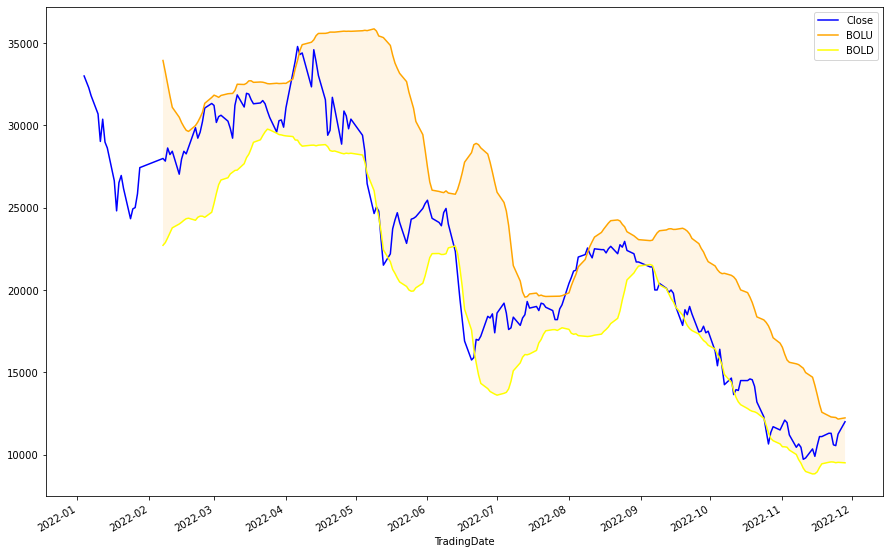

In [195]:
ax = df[['Close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(df.index, df['BOLD'], df['BOLU'], facecolor='orange', alpha=0.1)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

#### Cách sử dụng
- Nếu giá cổ phiếu liên tục chạm vào Dải bollinger trên ( BOLU ) thì thị trường được cho là quá mua. 
- Trong khi nếu giá liên tục chạm vào Dải bollinger thấp hơn ( BOLD ) thì thị trường được cho là quá bán.
- Thị trường càng biến động, dải trên và dải dưới sẽ càng rộng. Do đó, nó cũng chỉ ra mức độ biến động của thị trường tại một thời kỳ nhất định.
- Độ biến động được đo bằng Dải bollinger được gọi là sự siết chặt khi dải trên và dải dưới gần nhau. Đây được coi là một dấu hiệu cho thấy sẽ có nhiều biến động hơn trong tương lai sắp tới, mở ra những cơ hội giao dịch khả thi.
#### Note
- Một quan niệm sai lầm phổ biến về các dải là khi giá vượt qua giới hạn của dải trên và dải dưới, đó là tín hiệu giao dịch. Đây không phải là trường hợp.
- Như với tất cả các chỉ số giao dịch, nó không nên được sử dụng một mình để đưa ra quyết định giao dịch.


# C. Phân tích kỹ thuật với Moving Average

#### 1. Tính toán SMA

In [196]:
# Đường trung bình động đơn giản
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Đường trung bình động theo cấp số nhân
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

#### 2. Biểu đồ

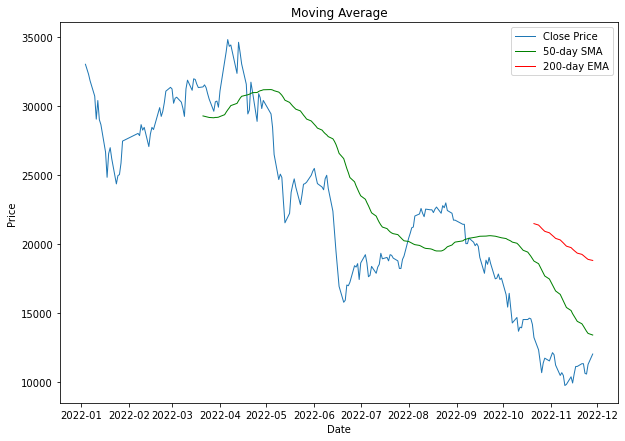

In [197]:
n = 50
SMA = SMA(df,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

# Tính toán EWMA 200 ngày
ew = 200
EWMA = EWMA(df,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

# Vẽ biểu đồ Chuỗi giá cổ phiếu của Google và Đường trung bình động bên dưới
plt.figure(figsize=(10,7))

# Đặt nhãn tiêu đề và trục
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Vẽ giá đóng cửa và đường trung bình động
plt.plot(df['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')
plt.plot(EWMA,'r', lw=1, label='200-day EMA')

# Thêm giải thích vào trục
plt.legend()

plt.show()

# D. Phân tích kỹ thuật với RSI

#### 1. RSI

##### 1.1 Hàm tính RSI

In [198]:
def rsi(close, periods = 14):
    
    close_delta = close.diff()

    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi 

##### 1.2 Biểu đồ

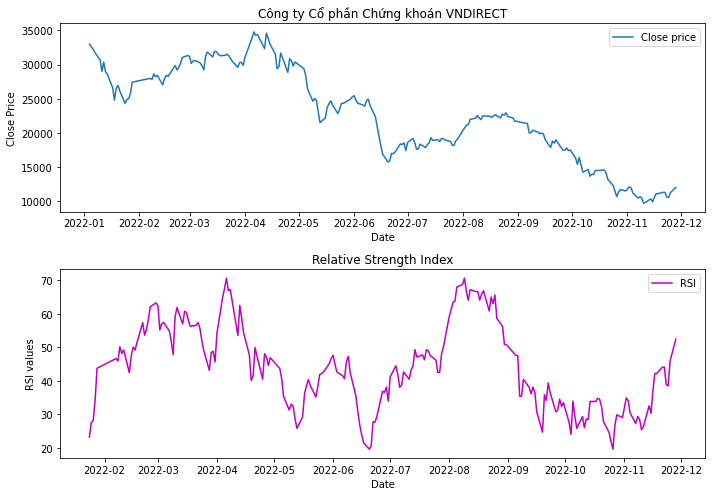

In [199]:
# Thêm quan sát RSI từ hàm
df['RSI'] = rsi(df['Close'])

# Kích cỡ biểu đồ (1)
fig = plt.figure(figsize=(10, 7))

# vị trí biểu đồ (1)
ax = fig.add_subplot(2, 1, 1)

# Tên gọi của biểu đồ và x,y (1)
plt.title('Công ty Cổ phần Chứng khoán VNDIRECT')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(df['Close'], label='Close price')

# Legend
plt.legend()

# vị trí biểu đồ (2)
bx = fig.add_subplot(2, 1, 2)

# Tên gọi của biểu đồ và x,y (2)
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI values')

plt.plot(df['RSI'], 'm', label='RSI')

# Legend
plt.legend()

plt.tight_layout()
plt.show()

#### 2 RIS-divergence 

##### 2.1 Lấy đỉnh

In [200]:
# Trả về một danh sách deques chứa các chỉ số cho các đỉnh cần thiết cho RSI, 
# Để có được tất cả các kết hợp có liên quan để xác định các phân kỳ, chúng ta 
# cần bốn hàm , một hàm cho mức cao hơn , mức thấp thấp hơn, 
# mức cao thấp hơn và mức thấp cao hơn.
def getHigherHighs(data: np.array, order=5, K=2):
      # điểm cao hơn điểm cao trước đó
  high_idx = argrelextrema(data, np.greater, order=order)[0]
  highs = data[high_idx]
  extrema = []
  ex_deque = deque(maxlen=K)
  for i, idx in enumerate(high_idx):
    if i == 0:
      ex_deque.append(idx)
      continue
    if highs[i] < highs[i-1]:
      ex_deque.clear()
    ex_deque.append(idx)
    if len(ex_deque) == K:
      extrema.append(ex_deque.copy())
  return extrema 

In [201]:
def getHigherLows(data: np.array, order=5, K=2):
    # điểm cao hơn điểm thấp trước đó
    low_idx = argrelextrema(data, np.less, order=order)[0]
    lows = data[low_idx]
    extrema = []
    ex_deque = deque(maxlen=K)
    for i, idx in enumerate(low_idx):
        if i == 0:
            ex_deque.append(idx)
            continue
        if lows[i] < lows[i-1]:
            ex_deque.clear()
        ex_deque.append(idx)
        if len(ex_deque) == K:
            extrema.append(ex_deque.copy())
    return extrema

In [202]:
def getLowerHighs(data: np.array, order=5, K=2):
    # điểm thấp hơn điểm cao trước đó
    high_idx = argrelextrema(data, np.greater, order=order)[0]
    highs = data[high_idx]
    extrema = []
    ex_deque = deque(maxlen=K)
    for i, idx in enumerate(high_idx):
        if i == 0:
            ex_deque.append(idx)
            continue
        if highs[i] > highs[i-1]:
            ex_deque.clear()
        ex_deque.append(idx)
        if len(ex_deque) == K:
            extrema.append(ex_deque.copy())
    return extrema

In [203]:
def getLowerLows(data: np.array, order=5, K=2):
    # điểm thấp hơn điểm thấp trước đó
    low_idx = argrelextrema(data, np.less, order=order)[0]
    lows = data[low_idx]
    extrema = []
    ex_deque = deque(maxlen=K)
    for i, idx in enumerate(low_idx):
        if i == 0:
            ex_deque.append(idx)
            continue
        if lows[i] > lows[i-1]:
            ex_deque.clear()
        ex_deque.append(idx)
        if len(ex_deque) == K:
            extrema.append(ex_deque.copy())
    return extrema

##### 2.2 Chuẩn bị dữ liệu đầu vào

In [204]:
# Công thức tính RSI chỉ dùng giá đóng cửa vì vậy xóa những quan sát không cần thiết
# Dữ liệu chỉ có ngày, nên tính RSI theo chu kỳ 24h
data = df.drop(['Open', 'High', 'Low', 'Volume', 'diff', 
  'color'], axis=1)
data

,Close,TP,std,MA-TP,BOLU,BOLD,RSI
TradingDate,,,,,,,
2022-01-04,32993.0,33045.666667,NaN,NaN,NaN,NaN,NaN
2022-01-05,32635.0,32992.666667,NaN,NaN,NaN,NaN,NaN
2022-01-06,32277.0,32502.666667,NaN,NaN,NaN,NaN,NaN
2022-01-07,31800.0,31985.666667,NaN,NaN,NaN,NaN,NaN
2022-01-10,30687.0,31137.666667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-11-22,11300.0,11416.666667,681.865313,10925.500000,12289.230627,9561.769373,44.119354
2022-11-23,10600.0,10883.333333,680.727062,10914.666667,12276.120791,9553.212542,38.891267
2022-11-24,10550.0,10483.333333,686.065493,10885.500000,12257.630987,9513.369013,38.539964


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2022-01-04 to 2022-11-28
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   225 non-null    float64
 1   TP      225 non-null    float64
 2   std     206 non-null    float64
 3   MA-TP   206 non-null    float64
 4   BOLU    206 non-null    float64
 5   BOLD    206 non-null    float64
 6   RSI     211 non-null    float64
dtypes: float64(7)
memory usage: 22.2 KB


##### 2.3 RIS-divergence

In [206]:
def calcRSI(data, P=14):
    data['diff_close'] = data['Close'] - data['Close'].shift(1)
    data['gain'] = np.where(data['diff_close']>0, data['diff_close'], 0)
    data['loss'] = np.where(data['diff_close']<0, np.abs(data['diff_close']), 0)
    data[['init_avg_gain', 'init_avg_loss']] = data[
    ['gain', 'loss']].rolling(P).mean()
    avg_gain = np.zeros(len(data))
    avg_loss = np.zeros(len(data))
    for i, _row in enumerate(data.iterrows()):
        row = _row[1]
        if i < P - 1:
            last_row = row.copy()
            continue
        elif i == P-1:
            avg_gain[i] += row['init_avg_gain']
            avg_loss[i] += row['init_avg_loss']
        else:
            avg_gain[i] += ((P - 1) * avg_gain[i-1] + row['gain']) / P
            avg_loss[i] += ((P - 1) * avg_loss[i-1] + row['loss']) / P
          
        last_row = row.copy()
      
    data['avg_gain'] = avg_gain
    data['avg_loss'] = avg_loss
    data['RS'] = data['avg_gain'] / data['avg_loss']
    data['RSI'] = 100 - 100 / (1 + data['RS'])
    return data

In [207]:
def getHHIndex(data: np.array, order=5, K=2):
    extrema = getHigherHighs(data, order, K)
    idx = np.array([i[-1] + order for i in extrema])
    return idx[np.where(idx<len(data))]

def getLHIndex(data: np.array, order=5, K=2):
    extrema = getLowerHighs(data, order, K)
    idx = np.array([i[-1] + order for i in extrema])
    return idx[np.where(idx<len(data))]

def getLLIndex(data: np.array, order=5, K=2):
    extrema = getLowerLows(data, order, K)
    idx = np.array([i[-1] + order for i in extrema])
    return idx[np.where(idx<len(data))]

def getHLIndex(data: np.array, order=5, K=2):
    extrema = getHigherLows(data, order, K)
    idx = np.array([i[-1] + order for i in extrema])
    return idx[np.where(idx<len(data))]

In [208]:
def getPeaks(data, key='Close', order=5, K=2):
    vals = data[key].values
    hh_idx = getHHIndex(vals, order, K)
    lh_idx = getLHIndex(vals, order, K)
    ll_idx = getLLIndex(vals, order, K)
    hl_idx = getHLIndex(vals, order, K)

    data[f'{key}_highs'] = np.nan
    data[f'{key}_highs'][hh_idx] = 1
    data[f'{key}_highs'][lh_idx] = -1
    data[f'{key}_highs'] = data[f'{key}_highs'].ffill().fillna(0)
    data[f'{key}_lows'] = np.nan
    data[f'{key}_lows'][ll_idx] = 1
    data[f'{key}_lows'][hl_idx] = -1
    data[f'{key}_lows'] = data[f'{key}_highs'].ffill().fillna(0)
    return data

In [209]:
def RSIDivergenceStrategy(data, P=14, order=5, K=2):
  '''
  Mua/bán trên giá và phân kỳ RSI.
  - Mua nếu giá xuống đáy thấp hơn và RSI xuống đáy cao hơn với RSI < 50
  - Bán nếu giá lên đỉnh cao hơn và RSI xuống đỉnh thấp hơn với RSI > 50
  Bán nếu phân kỳ biến mất.
  Bán nếu RSI vượt qua đường trung tâm.
  '''
  data = getPeaks(data, key='Close', order=order, K=K)
  data = calcRSI(data, P=P)
  data = getPeaks(data, key='RSI', order=order, K=K)

  position = np.zeros(data.shape[0])
  for i, (t, row) in enumerate(data.iterrows()):
    if np.isnan(row['RSI']):
      continue
    # If no position is on
    if position[i-1] == 0:
      # Buy if indicator to higher low and price to lower low
      if row['Close_lows'] == -1 and row['RSI_lows'] == 1:
        if row['RSI'] < 50:
          position[i] = 1
          entry_rsi = row['RSI'].copy()

      # Short if price to higher high and indicator to lower high
      elif row['Close_highs'] == 1 and row['RSI_highs'] == -1:
        if row['RSI'] > 50:
          position[i] = -1
          entry_rsi = row['RSI'].copy()

    # If current position is long
    elif position[i-1] == 1:
      if row['RSI'] < 50 and row['RSI'] < entry_rsi:
        position[i] = 1
  
    # If current position is short
    elif position[i-1] == -1:
      if row['RSI'] < 50 and row['RSI'] > entry_rsi:
        position[i] = -1

  data['position'] = position
  return calcReturns(data)

def calcReturns(df):
  # Helper function to avoid repeating too much code
  df['returns'] = df['Close'] / df['Close'].shift(1)
  df['log_returns'] = np.log(df['returns'])
  df['strat_returns'] = df['position'].shift(1) * df['returns']
  df['strat_log_returns'] = df['position'].shift(1) * df['log_returns']
  df['cum_returns'] = np.exp(df['log_returns'].cumsum()) - 1
  df['strat_cum_returns'] = np.exp(df['strat_log_returns'].cumsum()) - 1
  df['peak'] = df['cum_returns'].cummax()
  df['strat_peak'] = df['strat_cum_returns'].cummax()
  return df

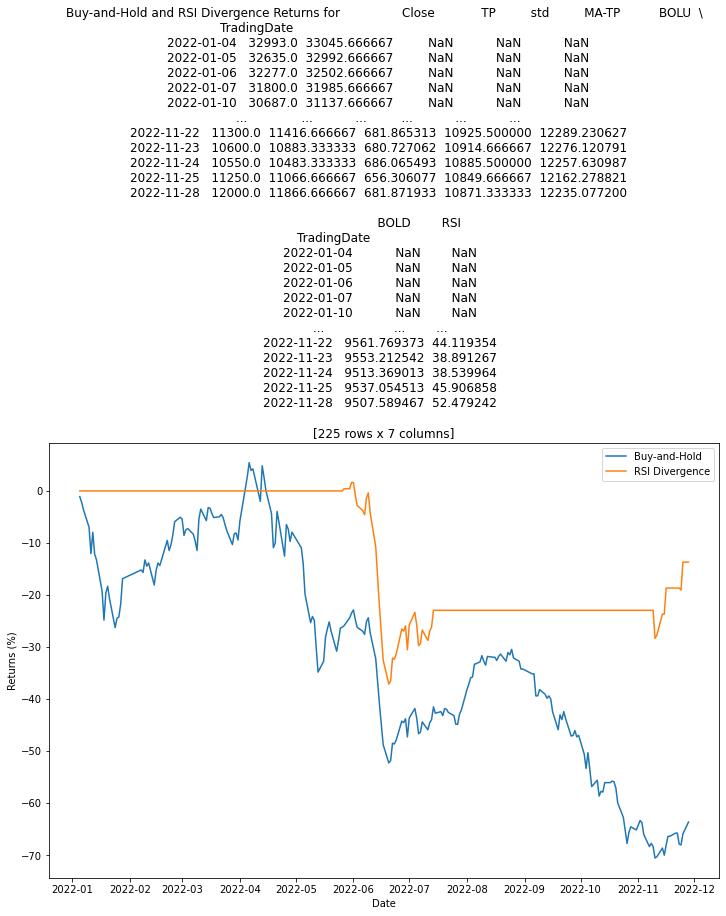

In [210]:
df_div = RSIDivergenceStrategy(data.copy())

plt.figure(figsize=(12, 8))
plt.plot(df_div['cum_returns'] * 100, label='Buy-and-Hold')
plt.plot(df_div['strat_cum_returns'] * 100, label='RSI Divergence')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title(f'Buy-and-Hold and RSI Divergence Returns for {data}')
plt.legend()
plt.show()

Tài liệu tham khảo

- https://www.youtube.com/watch?v=BiPwmBVo2oQ

- https://pypi.org/project/vnstock/

- https://blog.quantinsti.com/build-technical-indicators-in-python/

- https://www.folkstalk.com/2022/10/python-rsi-trading-strategy-with-code-examples.html

- https://raposa.trade/blog/test-and-trade-rsi-divergence-in-python/

- https://www.kaggle.com/code/chandrimad31/forex-trading-momentum-analysis-rsi-divergence/notebook